# Worksheet 12

Name:  Sangjoon Lee
UID: U79516048

### Topics

- Support Vector Machines

### Support Vector Machines

a) Consider the following dataset:

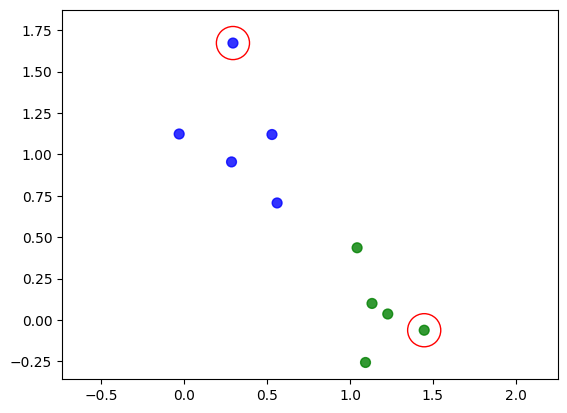

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

The SVM wouldn't change if the points are moved because the points are far away from the boundary line so they do not affect the SVM.

b) If we were to fit an SVM to the above dataset, which points do you think would be the support vectors? Circle them in red.

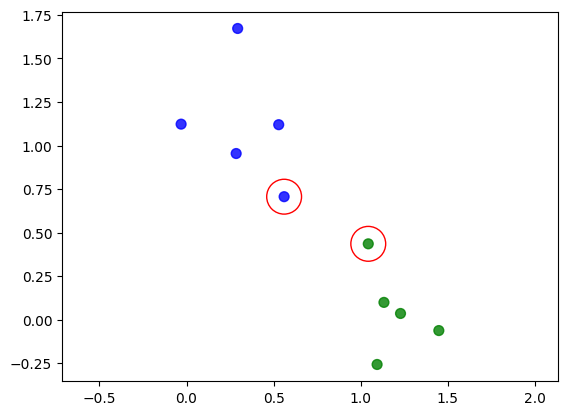

In [2]:
cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[6][0], X[6][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[2][0], X[2][1]), .1, color='r',fill=False))
plt.show()

c) Consider the following dataset containing only two points: `{(0,0), (4,4)}`. We can see that the line `y = -x + 4` separates the data. But the `w` is not right for SVM. Similar to what we did in class, compute the `w` that creates the widest street.

$\sqrt{32}$ = 4 $\sqrt{2}$

w = $\frac{1}{4}$

d) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

The n parameter of the kernel function should be decreased to mitigate the overfit.

e) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

The sigma of the kernel function should be increased to mitigate the underfit.

For the following questions we'll be using the [iris dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

f) Plot a 3d plot of (petal width, petal length, sepal length) and color each point with one of three colors depending on the iris species. Comment on what you observe.

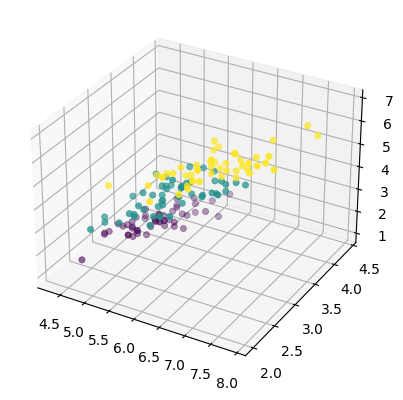

In [4]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', linewidth=0.5);

g) Split the dataset into a training and testing set.

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

h) Fit an SVM to the training set. Evaluate the fitted SVM on the testing set by plotting the confusion matrix. Explain the kernel function you used and its parameters.

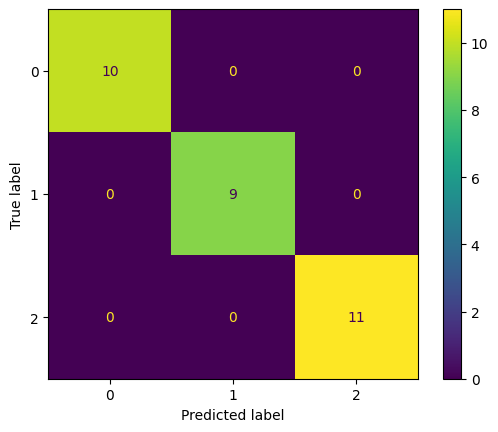

In [11]:
from sklearn import metrics

clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train, y_train)

predicted = clf.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()

I used 'kernel=linear' for linear SVM and I put 'gamma='scale'' to include X's variance in the kernel function.